# Kissaki Restaurants
---
#### Student Angelica Bueno Ñáñez

### INTRO

Kissaki Restaurant group, established in Jan 2020, has faced different challenges since it's inception. Just months into opening their first location, in Manhattan, the COVID pandemic hit forcing them to offer Take Out while also opening a second location in Manhattan. In 2021 they opened 2 seasonal locations in the Hamptons, and 1 in Greenwich, CT. Since the information available for the full year is from the Manhattan locations, we are working with those two. 

To understand the sales behaviour of 2021 I considered 3 categories of data: 
1. Reservations / Delivery Data: From TOAST and RESY, restaurant softwares
2. Marketing Data: From Google and FB Ads accounts
3. NYC Data: NYC Weather from National Weather Service. COVID cases from NYCDoH (New York City Department of Health)


### PROBLEM
The pandemic has hit the restaurant industry among the hardest and it is imperative to find a way to bring more dollars in. The main questions to answer are:

* Understanding that COVID has affected people's behaviour, is there a way to improve sales using last year's data?

* Is Digital Marketing is helping to increase sales?


### HYPOTHESIS
1. The more covers - people dining in / delivery orders - the better sales. 
2. The lower the COVID cases, the better the sales
3. The higer impact of Digital Marketing, the higher the sales. 

Basically, we assume that by understanding what motivates people to come to the restaurant, we will be able to influence their behavior to show up and spend at Kissaki. 


## Code

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
import numpy as np
from ipywidgets import interact
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor

import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
master = pd.read_csv('./Data/Master Table.csv')

In [142]:
master.sample(3)

,Date,Location,Dining Option,Covers,Net Sales,Temperature_Max,Temperature_Min,Temperature_Avg,Precipitation,Snow Depth,First Time Reservations,FB_CTR,FB_Impressions,FB_Conversions,FB_Cost,Google_Impressions,Google_Conversions,Google_Cost,Google_CTR
1071,12/8/21,Bowery,Dine In,51.0,8716.00,42.0,34.0,38.0,0.04,0.0,16,0.02,5303.0,116,82.70,686,0,174.33,0.000000
553,7/8/21,Columbus,Take Out,16.0,2219.01,84.0,71.0,77.5,2.27,0.0,3,0.00,15741.5,4,245.77,4355,3,66.19,0.000574
544,6/29/21,Columbus,Take Out,13.0,1315.50,95.0,78.0,86.5,0.00,0.0,2,0.00,14176.5,4,227.40,5563,3,111.41,0.000449


## Data Dictionary
* Date: Time of the year. YYYY/MM/DD
* Location: Street in NYC where the Restaurant is located
* Dining Option: Dine-in or Take Out
* Reservations: First Time Reservation or Repeat Reservations
* Covers: Guest count when Dining in or Orders when Take Out  
* Net Sales: Total sales before tax and gratuity. In dollars
* Temperature: Average temperature per day. In Farenheit degrees
* Precipitation: Total NYC rainfall per day. In inches
* Snow Depth: Total NYC snowfall per day. In inches
* FB_CTR: Click Through Rate of FB Ads.
* FB_Impressions: Total Users each FB Ad was exposed to
* FB_Conversions: Total Users who converted from FB Ads
* FB_Cost: Total cost spent on FB Ads. In dollars
* Google_Impressions: Total Users each Google Ad was exposed to
* Google_Conversions: Total Users who converted from Google Ads
* Google_Cost: Total cost spent on Google Ads. In dollars
* Google_CTR: Click Through Rate of Google Ads
* NYC_Cases: Reported positive COVID cases a day in all 5 boros
* MN_Cases: Reported positive COVID cases a day in Manhattan only

---
### Last cleaning steps and joining tables

In [143]:
master.dtypes

Date                        object
Location                    object
Dining Option               object
Covers                     float64
Net Sales                  float64
Temperature_Max            float64
Temperature_Min            float64
Temperature_Avg            float64
Precipitation              float64
Snow Depth                 float64
First Time Reservations      int64
FB_CTR                     float64
FB_Impressions             float64
FB_Conversions               int64
FB_Cost                    float64
Google_Impressions           int64
Google_Conversions           int64
Google_Cost                float64
Google_CTR                 float64
dtype: object

In [144]:
master.Date = pd.to_datetime(master.Date)

In [145]:
master.shape

(1460, 19)

In [146]:
pd.DataFrame(master.isnull().sum(), columns= ['Nulls'])

,Nulls
Date,0
Location,0
Dining Option,0
Covers,126
Net Sales,126
Temperature_Max,0
Temperature_Min,0
Temperature_Avg,0
Precipitation,0
Snow Depth,0


In [147]:
covid = pd.read_excel('./Data/Covid.xlsx')

In [148]:
covid.sample(3)

,Date,NYC_Cases,MN_Cases
145,2021-05-26,249,40
55,2021-02-25,3482,514
325,2021-11-22,1531,297


In [149]:
covid.dtypes

Date         datetime64[ns]
NYC_Cases             int64
MN_Cases              int64
dtype: object

In [150]:
master= pd.merge(master, covid, on = ['Date'])

In [151]:
repeat_guests = pd.read_csv('./Data/Repeat Guests by Day 2022.csv')

In [152]:
repeat_guests.shape

(730, 3)

In [153]:
repeat_guests.Date =  pd.to_datetime(repeat_guests.Date)

In [154]:
repeat_guests.dtypes

Date                   datetime64[ns]
Location                       object
Repeat Reservations             int64
dtype: object

In [155]:
master.shape

(1460, 21)

In [156]:
master = pd.merge(master,repeat_guests, on=['Date', 'Location'])

In [157]:
master.columns

Index(['Date', 'Location', 'Dining Option', 'Covers', 'Net Sales',
       'Temperature_Max', 'Temperature_Min', 'Temperature_Avg',
       'Precipitation', 'Snow Depth', 'First Time Reservations', 'FB_CTR',
       'FB_Impressions', 'FB_Conversions', 'FB_Cost', 'Google_Impressions',
       'Google_Conversions', 'Google_Cost', 'Google_CTR', 'NYC_Cases',
       'MN_Cases', 'Repeat Reservations'],
      dtype='object')

In [158]:
master = master.reindex(columns = ['Date', 'Location','Dining Option', 'Covers', 'Net Sales','First Time Reservations','Repeat Reservations'  
                ,'Temperature_Max', 'Temperature_Min', 'Temperature_Avg',
                 'Precipitation', 'Snow Depth', 'FB_CTR',
               'FB_Impressions', 'FB_Conversions', 'FB_Cost', 'Google_Impressions',
               'Google_Conversions', 'Google_Cost', 'Google_CTR', 'NYC_Cases',
               'MN_Cases'])

In [159]:
master.to_csv('./Data/MasterFinal')

In [160]:
master = master.drop(columns=['Temperature_Max','Temperature_Min', 'FB_CTR','Google_CTR'])

In [161]:
master.head()

,Date,Location,Dining Option,Covers,Net Sales,First Time Reservations,Repeat Reservations,Temperature_Avg,Precipitation,Snow Depth,FB_Impressions,FB_Conversions,FB_Cost,Google_Impressions,Google_Conversions,Google_Cost,NYC_Cases,MN_Cases
0,2021-01-01,Bowery,Take Out,26.0,2962.9,11,0,36.5,0.62,0.0,8557.5,4,70.09,8584,0,24.22,1339,163
1,2021-01-01,Bowery,Dine In,27.0,2108.0,11,0,36.5,0.62,0.0,8557.5,4,70.09,8584,0,24.22,1339,163
2,2021-01-01,Columbus,Take Out,22.0,2920.0,9,-1,36.5,0.62,0.0,8557.5,4,70.09,8433,0,11.11,1339,163
3,2021-01-01,Columbus,Dine In,14.0,2007.0,9,-1,36.5,0.62,0.0,8557.5,4,70.09,8433,0,11.11,1339,163
4,2021-01-02,Bowery,Take Out,24.0,2877.5,22,0,43.5,0.05,0.0,7402.0,9,71.23,9295,0,17.49,4202,518


--- 

## Exploratory Data Analysis


In [162]:
master.shape

(1460, 18)

In [163]:
master.describe()

,Covers,Net Sales,First Time Reservations,Repeat Reservations,Temperature_Avg,Precipitation,Snow Depth,FB_Impressions,FB_Conversions,FB_Cost,Google_Impressions,Google_Conversions,Google_Cost,NYC_Cases,MN_Cases
count,1334.000000,1334.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,25.395802,3604.307841,11.675342,5.054795,56.998630,0.163644,0.460274,6917.828767,12.205479,94.473877,5506.827397,1.478082,67.416110,2891.030137,518.405479
std,18.758444,3431.237520,7.825203,4.118500,16.503577,0.560067,1.917185,4881.493090,22.419613,69.276545,8445.757490,1.659149,45.019352,6350.598031,1201.878400
min,0.000000,0.000000,0.000000,-6.000000,19.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.000000,14.000000
25%,13.000000,1363.022500,5.000000,2.000000,42.500000,0.000000,0.000000,2265.000000,0.000000,32.160000,389.000000,0.000000,34.330000,688.000000,106.000000
50%,20.000000,2259.875000,10.000000,5.000000,58.000000,0.000000,0.000000,6641.500000,5.000000,75.740000,1845.000000,1.000000,66.040000,1323.000000,233.000000
75%,34.000000,4953.500000,16.000000,7.000000,71.500000,0.070000,0.000000,10199.500000,10.000000,137.260000,6499.000000,2.000000,92.570000,2894.000000,442.000000
max,109.000000,18489.000000,45.000000,26.000000,86.500000,7.130000,14.000000,24287.500000,312.000000,319.330000,46505.000000,14.000000,321.130000,51046.000000,8421.000000


##### Initial observations: 
     
  * First time reservations average double the average of repeat reservations. 
  * There's a higher spread in first time reservations than in repeat reservations.
  * Between Facebook and Google, the Max Impressions is higher on Google than in FB, but FB Average Impressions are highest.
    

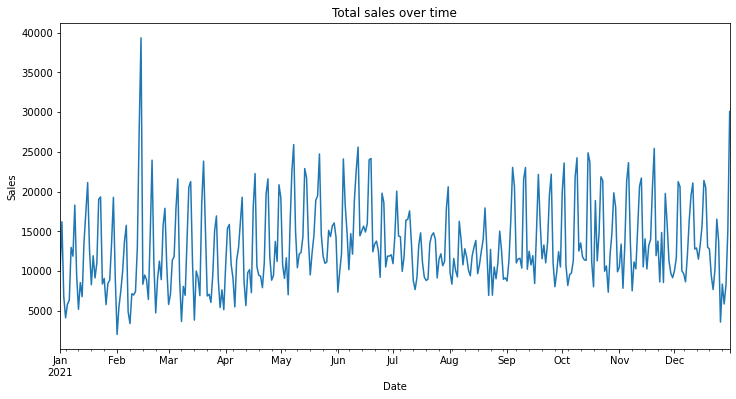

In [164]:
master.groupby('Date').sum()['Net Sales'].plot(title='Total sales over time',ylabel='Sales', figsize=(12,6));

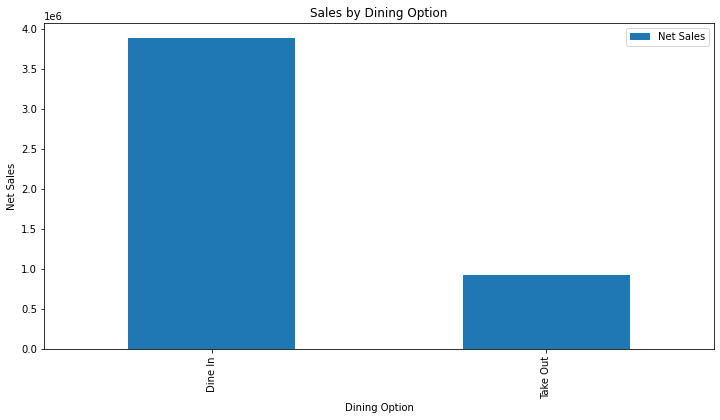

In [165]:
master.groupby(['Dining Option']).sum()['Net Sales'].plot(kind='bar',figsize=(12,6),legend = True,title = 'Sales by Dining Option',ylabel='Net Sales');

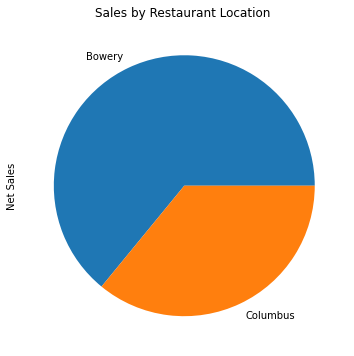

In [166]:
master.groupby(['Location']).sum()['Net Sales'].plot(kind='pie',figsize=(12,6),title = 'Sales by Restaurant Location ',ylabel='Net Sales');

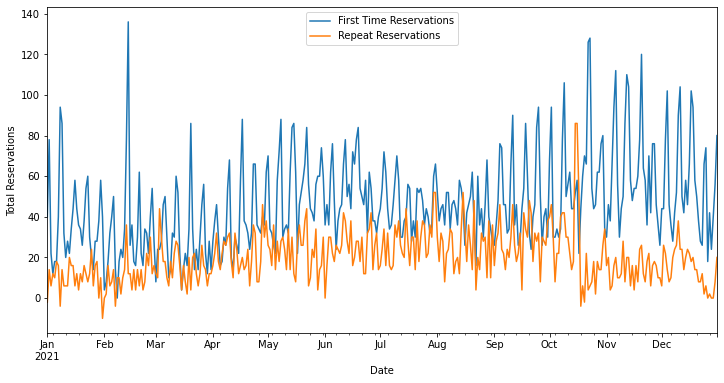

In [167]:
master.groupby('Date').sum()[['First Time Reservations','Repeat Reservations']].plot(ylabel = 'Total Reservations', figsize=(12,6));


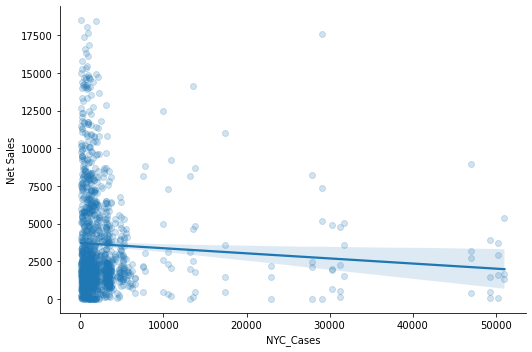

In [168]:
sns.lmplot(x='NYC_Cases', y='Net Sales', data=master, aspect=1.5, scatter_kws={'alpha':0.2});

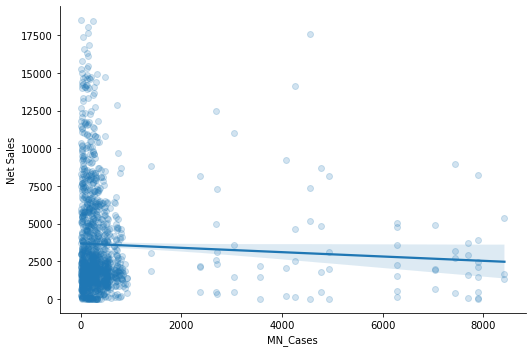

In [169]:
sns.lmplot(x='MN_Cases', y='Net Sales', data=master, aspect=1.5, scatter_kws={'alpha':0.2});

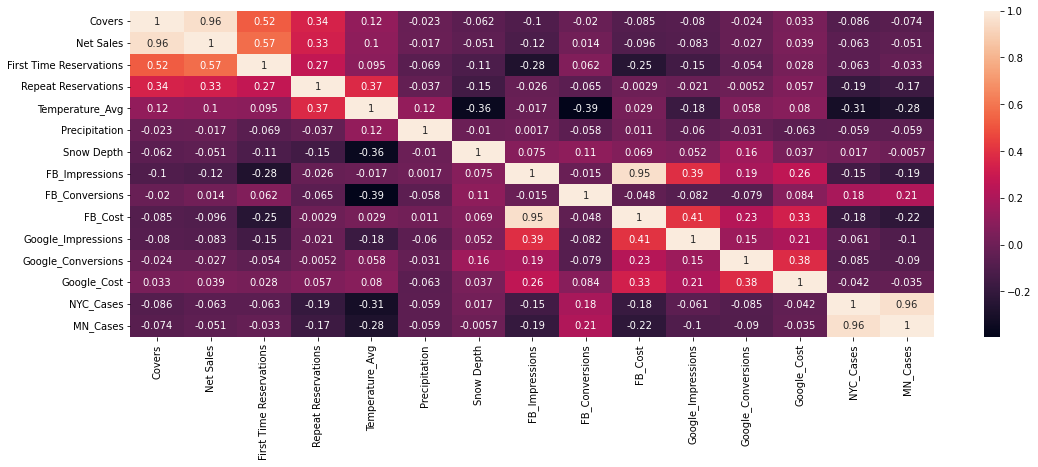

In [170]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(master.corr(),annot=True);

### EDA Observations

From the visualizations above we can see:

* The trend in the sales indicates higher sales on weekends and lower during weekdays. 
* Two important dates for sales are Saint Valentine's and New Year's Eve.

* Total sales for 2021 were about $5Mi. Dine-in is the majority sales driver with 80% of total sales, and Bowery is the Location with higher sales.

* First Time Reservations correlate more strongly with sales than Repeat. 

* Covid cases impacted negatively the general operation as expected. 

* There are strong correlations between Reservation type, weather, and covid cases that will be analyzed and predicted with a linear regression below. Some unexpected negative correlations were observed too, on the Digital Marketing side that will be analyzed in a time series below, because impact of ads has a lag from the day deployed. 


## MODEL - LINEAR REGRESSION
### TRAIN TEST SPLIT

In [171]:
master_clean = master._get_numeric_data()

In [172]:
master_clean.sample()

,Covers,Net Sales,First Time Reservations,Repeat Reservations,Temperature_Avg,Precipitation,Snow Depth,FB_Impressions,FB_Conversions,FB_Cost,Google_Impressions,Google_Conversions,Google_Cost,NYC_Cases,MN_Cases
570,18.0,2107.5,9,2,78.0,0.0,0.0,12095.5,6,181.6,3269,3,84.18,187,17


In [173]:
master_clean = master_clean.fillna(value={'Covers':master['Covers'].mean(), 'Net Sales':master['Net Sales'].mean()})


In [174]:
master_clean.isnull().sum()

Covers                     0
Net Sales                  0
First Time Reservations    0
Repeat Reservations        0
Temperature_Avg            0
Precipitation              0
Snow Depth                 0
FB_Impressions             0
FB_Conversions             0
FB_Cost                    0
Google_Impressions         0
Google_Conversions         0
Google_Cost                0
NYC_Cases                  0
MN_Cases                   0
dtype: int64

In [175]:
feature_cols = master_clean.columns.drop(['Covers', 'Net Sales','FB_Conversions','FB_Impressions','FB_Cost','Google_Impressions','Google_Conversions', 'Google_Cost'])
X = master_clean[feature_cols]
y = master_clean['Net Sales']

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [178]:
print(X_train.shape)
print(X_test.shape)

(1095, 7)
(365, 7)


In [179]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [180]:
y_pred = linreg.predict(X_test)

In [181]:
#y_pred

In [182]:
print(f'Intercept: {linreg.intercept_}')

Intercept: 599.0284691361344


In [183]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

2782.9493373782675

In [184]:
list(zip(feature_cols, linreg.coef_))

[('First Time Reservations', 206.34071129237327),
 ('Repeat Reservations', 167.15337488386996),
 ('Temperature_Avg', -4.585054662140635),
 ('Precipitation', 86.67031987021002),
 ('Snow Depth', 48.09502732955098),
 ('NYC_Cases', 0.024854535995388005),
 ('MN_Cases', -0.11397118268477868)]

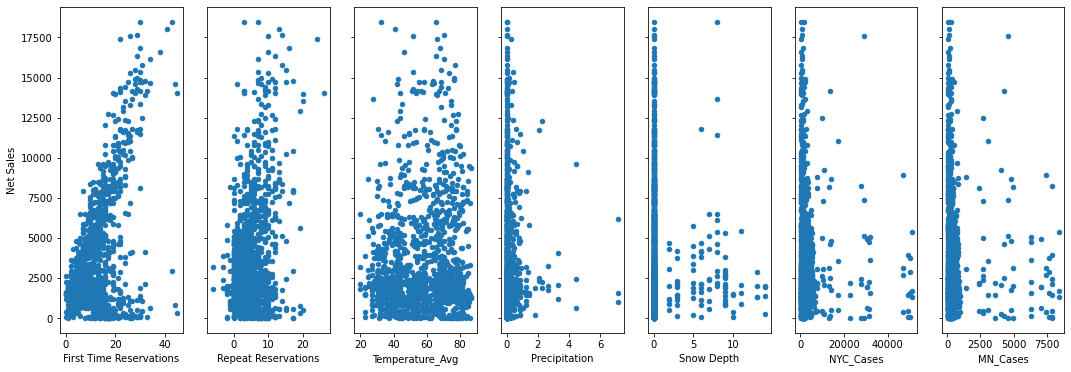

In [185]:
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    master.plot(kind='scatter', x=feature, y='Net Sales', ax=axs[index], figsize=(18,6))

### MODEL A - NULL ACCURACY

In [186]:
### TESTING LINEAR REGRESSION
print('Model 1 score:',linreg.score(X_test, y_test))

## NULL RMSE: Create a benchmark that always predicts the mean
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())

# Compute RMSE and compare with Null RMSE
print('Null model score:',linreg.score(X_test, y_null))
print('======================')
print('Null RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_null)))
print('Model 1 RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model 1 score: 0.26216608734175306
Null model score: -1.9273946690107538e+30
Null RMSE: 3239.858134548099
Model 1 RMSE: 2782.9493373782675


### Conclusions Model A

1. This data has combined sales data, from Dine-in and TakeOut Dining Options. However, each of them behave differently and needs to be reviewed separately.

2.  2021 was the 1st full year of in-person dining for these restaurant locations. Hence the higher correlation between Sales and First Time Reservations rathen than Repeat Reservations.

3. The restaurants are located in Manhattan, where during July and August most of locals leave. Therefore the negative correlation between Net Sales and AVG. Temperature can be misleading but it fits. 

4. COVID has impacted the restaurant industry greatly but by 2021 measures were taken in the city to protect the general public restore its confidence to dine-in. The model shows a minor correlation between Covid and sales. 

Considering all these the model still predicts better than the null accuracy model. 


---

## MODEL B - Applied on different Dining Options

In [187]:
takeout = master[(master['Dining Option']=='Take Out')]
dine_in = master[(master['Dining Option']=='Dine In')]

In [188]:
print(takeout.shape)
print(dine_in.shape)

(730, 18)
(730, 18)


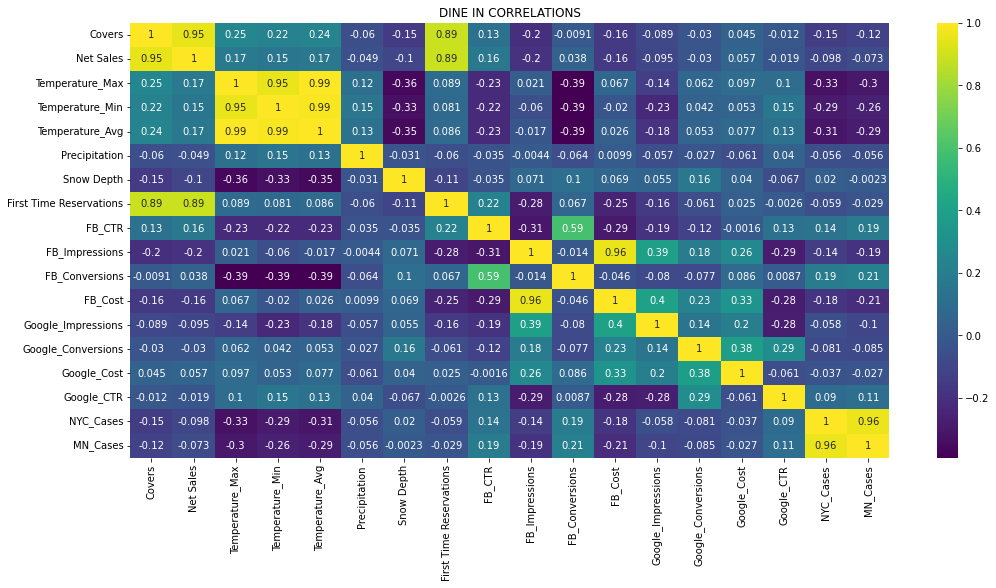

In [282]:
fig, ax = plt.subplots(figsize=(17,8))
sns.heatmap(dine_in.corr(),annot=True, cmap='viridis')
ax.set_title('DINE IN CORRELATIONS')
plt.show();

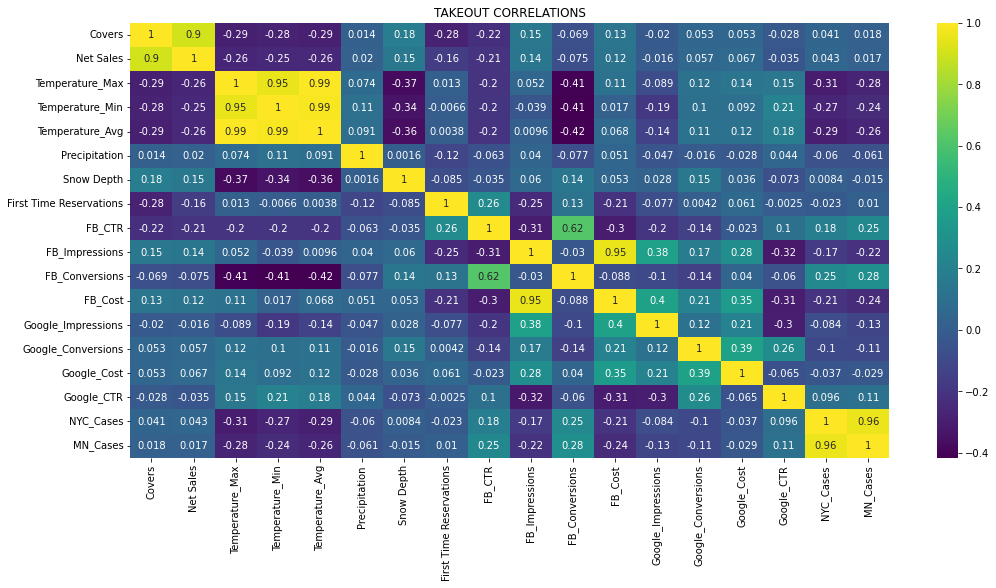

In [281]:
fig, ax = plt.subplots(figsize=(17,8))
sns.heatmap(takeout.corr(),annot=True, cmap='viridis')
ax.set_title('TAKEOUT CORRELATIONS')
plt.show();

---

### Dining Option: Dine In

In [191]:
dine_in_clean = dine_in._get_numeric_data()

In [192]:
dine_in_clean = dine_in_clean.fillna(value={'Covers':master['Covers'].mean(), 'Net Sales':master['Net Sales'].mean()})


In [193]:
dine_in_clean.isnull().sum()

Covers                     0
Net Sales                  0
First Time Reservations    0
Repeat Reservations        0
Temperature_Avg            0
Precipitation              0
Snow Depth                 0
FB_Impressions             0
FB_Conversions             0
FB_Cost                    0
Google_Impressions         0
Google_Conversions         0
Google_Cost                0
NYC_Cases                  0
MN_Cases                   0
dtype: int64

In [194]:
feature_cols1 = dine_in_clean.columns.drop(['Net Sales','Covers', 'FB_Conversions','FB_Impressions','FB_Cost','Google_Impressions','Google_Conversions', 'Google_Cost'])
X = dine_in_clean[feature_cols1]
y = dine_in_clean['Net Sales']

In [195]:
X.shape

(730, 7)

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [197]:
print(f'Intercept: {linreg.intercept_}')

Intercept: -464.31686991369224


In [198]:
list(zip(feature_cols1, linreg.coef_))

[('First Time Reservations', 386.9680994956415),
 ('Repeat Reservations', 290.34885544394876),
 ('Temperature_Avg', -4.517354850309184),
 ('Precipitation', 100.43384810031912),
 ('Snow Depth', 60.150924553278166),
 ('NYC_Cases', 0.06404030691220441),
 ('MN_Cases', -0.3213147269626546)]

In [199]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1242.5627745236036

In [200]:
### TESTING LINEAR REGRESSION
print('Model 2 score:',linreg.score(X_test, y_test))

## NULL RMSE: Create a benchmark that always predicts the mean
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())

# Compute RMSE and compare with Null RMSE
print('Null model score:',linreg.score(X_test, y_null))
print('======================')
print('Null RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_null)))
print('Model 2 RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model 2 score: 0.8826428917095289
Null model score: -1.376620839792563e+31
Null RMSE: 3627.1343201568307
Model 2 RMSE: 1242.5627745236036


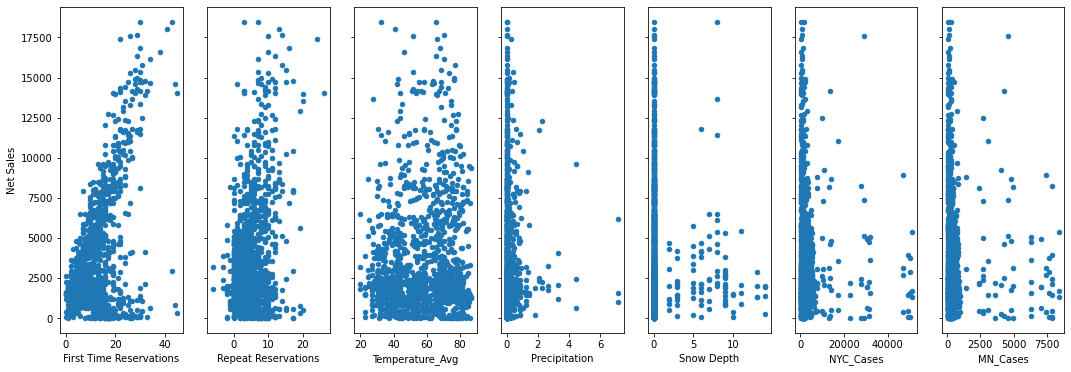

In [201]:
fig, axs = plt.subplots(1, len(feature_cols1), sharey=True)
for index, feature in enumerate(feature_cols1):
    master.plot(kind='scatter', x=feature, y='Net Sales', ax=axs[index], figsize=(18,6))

### Conclusions Model B - Dine in:

In this model we use half the data - 730 rown and 7 columns that correspond to the Dine in Option. All other previous observations apply, these model is a better predictor of sales. Knowing the operation, the coeficient for First Time Reservations is closer to the average spend for the average reservation. 
    

---

### Dining Option: Take Out

In [202]:
takeout_clean = takeout._get_numeric_data()

In [203]:
takeout_clean = takeout_clean.fillna(value={'Covers':master['Covers'].mean(), 'Net Sales':master['Net Sales'].mean()})


In [204]:
feature_cols2 = takeout_clean.columns.drop(['Covers','Net Sales', 'FB_Conversions','FB_Impressions','FB_Cost','Google_Impressions','Google_Conversions', 'Google_Cost'])
X = takeout_clean[feature_cols2]
y = takeout_clean['Net Sales']

In [205]:
X.shape

(730, 7)

In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [207]:
print(f'Intercept: {linreg.intercept_}')

Intercept: 1603.4400002493542


In [208]:
list(zip(feature_cols2, linreg.coef_))

[('First Time Reservations', 25.494260779363255),
 ('Repeat Reservations', -0.35948259295910245),
 ('Temperature_Avg', -0.38012278948210665),
 ('Precipitation', 178.31456487991156),
 ('Snow Depth', 44.182861599217986),
 ('NYC_Cases', 0.03330715267201195),
 ('MN_Cases', -0.20185577128411822)]

In [209]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1120.038164149054

In [210]:
### TESTING LINEAR REGRESSION
print('Model 3 score:',linreg.score(X_test, y_test))

## NULL RMSE: Create a benchmark that always predicts the mean
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())

# Compute RMSE and compare with Null RMSE
print('Null model score:',linreg.score(X_test, y_null))
print('======================')
print('Null RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_null)))
print('Model 3 RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model 3 score: -0.028019776711270872
Null model score: -1.6394327695072216e+30
Null RMSE: 1104.6687954457009
Model 3 RMSE: 1120.038164149054


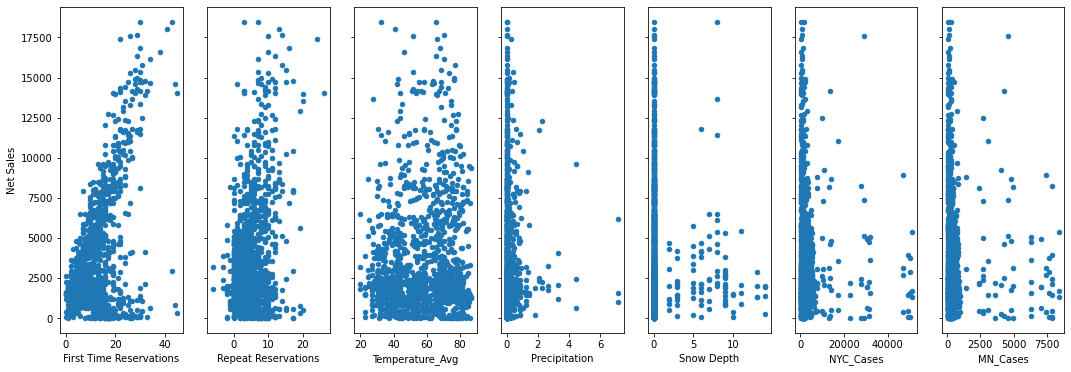

In [211]:
fig, axs = plt.subplots(1, len(feature_cols2), sharey=True)
for index, feature in enumerate(feature_cols2):
    master.plot(kind='scatter', x=feature, y='Net Sales', ax=axs[index], figsize=(18,6))

### Conclusions Model B - Take Out:

Continuing with the half data corresponding to the Take Out Option, these model is not a better predictor of sales as the RMSE is greater than the Null RMSE. 
    

## CONCLUSIONS 
1. The more covers - people dining in / delivery orders - the better sales: Not just covers but specifically First Time Reservations drive sales.  
2. The lower the COVID cases, the better the sales: COVID did not proof to be a strong predictor of sales in 2021. 
3. The higer impact in Digital Marketing, the higher the sales: The only positive correlation found was on Takeout. 

## MODEL 1 ADDENDUMS 

In [212]:
#sns.pairplot(master);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


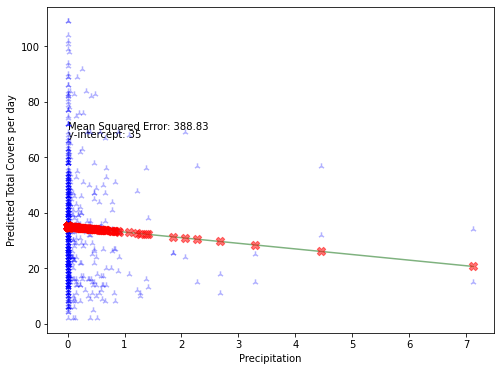

In [213]:
# Let's remove any outliers from our input data first
lof = LocalOutlierFactor(contamination='auto')
#ti_clean = ti_clean[pd.Series(lof.fit_predict(ti_clean.values)).apply(lambda x: True if x == 1 else False).values]
dine_in_clean = dine_in_clean[pd.Series(lof.fit_predict(dine_in_clean.values)).apply(lambda x: True if x== 1 else False).values]

#X = ti_clean['fare'].values.reshape(-1,1)
X = dine_in_clean['Precipitation'].values.reshape(-1,1)

#X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
X = np.concatenate([X, np.ones((X.shape[0],1))],axis=1)

# set "fare" as the factor we wish to predict
#y = ti_clean['age'].values
y = dine_in_clean.Covers.values

# Note the difference in argument order compared to sklearn
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()

# first, plot the predicted age vs the fare paid
plt.figure(figsize=(8,6))

# First, we'll plot the actual values for fare.
# X[:,0] is just our fare column from our X matrix, only we 
# are using numpy to select the column instead of pandas.
# y is our actual age of the person. Markers are blue
plt.scatter(X[:,0], y, s=40, c=(0,0,1,0.3), marker='2', zorder=10)

# Next, we can plot the predicted values
plt.scatter(X[:,0], model.predict(X), s=70, c=(1,0,0,0.3), marker='X', zorder=10)
plt.ylabel("Predicted Total Covers per day")
plt.xlabel("Precipitation")

# plot the regression line from the model
X_to_predict = np.concatenate(
    (
        np.linspace(X[:,0].min(), X[:,0].max(), num=X.shape[0]).reshape(-1,1), 
        np.ones((X.shape[0], 1))
    ),
    axis=1
)

plt.plot(
    X_to_predict[:,0], 
    model.get_prediction(X_to_predict).predicted_mean, 
    c=(0,0.4,0,0.5)
)

# annotate
#axes.arrow(42, 60, 4, -9, width=1, head_width=3, head_length=3, fc='k', ec='k')
plt.text(0, 70, f'Mean Squared Error: {mean_squared_error(y, model.predict(X)):.2f}', fontdict={'fontsize': 10})
plt.text(0, 67, f'y-intercept: {model.params[-1]:.0f}', fontdict={'fontsize': 10})

plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


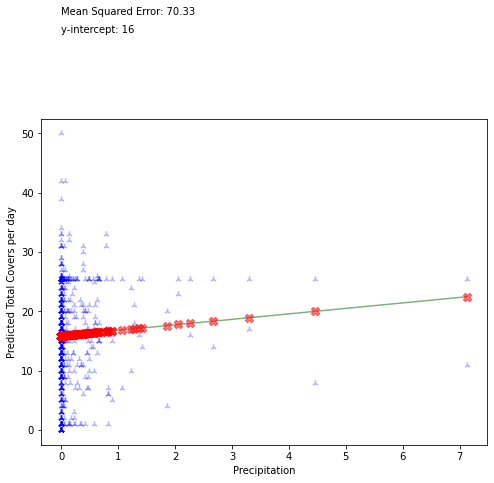

In [214]:
# Let's remove any outliers from our input data first
lof = LocalOutlierFactor(contamination='auto')
#ti_clean = ti_clean[pd.Series(lof.fit_predict(ti_clean.values)).apply(lambda x: True if x == 1 else False).values]
takeout_clean = takeout_clean[pd.Series(lof.fit_predict(takeout_clean.values)).apply(lambda x: True if x== 1 else False).values]

#X = ti_clean['fare'].values.reshape(-1,1)
X = takeout_clean['Precipitation'].values.reshape(-1,1)

#X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
X = np.concatenate([X, np.ones((X.shape[0],1))],axis=1)

# set "fare" as the factor we wish to predict
#y = ti_clean['age'].values
y = takeout_clean.Covers.values

# Note the difference in argument order compared to sklearn
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()

# first, plot the predicted age vs the fare paid
plt.figure(figsize=(8,6))

# First, we'll plot the actual values for fare.
# X[:,0] is just our fare column from our X matrix, only we 
# are using numpy to select the column instead of pandas.
# y is our actual age of the person. Markers are blue
plt.scatter(X[:,0], y, s=40, c=(0,0,1,0.3), marker='2', zorder=10)

# Next, we can plot the predicted values
plt.scatter(X[:,0], model.predict(X), s=70, c=(1,0,0,0.3), marker='X', zorder=10)
plt.ylabel("Predicted Total Covers per day")
plt.xlabel("Precipitation")

# plot the regression line from the model
X_to_predict = np.concatenate(
    (
        np.linspace(X[:,0].min(), X[:,0].max(), num=X.shape[0]).reshape(-1,1), 
        np.ones((X.shape[0], 1))
    ),
    axis=1
)

plt.plot(
    X_to_predict[:,0], 
    model.get_prediction(X_to_predict).predicted_mean, 
    c=(0,0.4,0,0.5)
)

# annotate
#axes.arrow(42, 60, 4, -9, width=1, head_width=3, head_length=3, fc='k', ec='k')
plt.text(0, 70, f'Mean Squared Error: {mean_squared_error(y, model.predict(X)):.2f}', fontdict={'fontsize': 10})
plt.text(0, 67, f'y-intercept: {model.params[-1]:.0f}', fontdict={'fontsize': 10})

plt.show();

# TIME SERIES ANALYSIS ON MARKETING DATA

This below part of the analysis has an important component not considered before, time. In the correlation's heatmap above I could not account for the lagging impact of Ads in peoples behaviour, so here I try to map the relations and importance of them in order to drive sales in the Restaurants. 

---

### Last part of Data Cleaning and Joning Tables

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
from ipywidgets import interact
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor

In [216]:
from datetime import datetime
from datetime import timedelta
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)

In [217]:
master = pd.read_csv('./Data/Master0318')

In [218]:
master.drop(columns = ['Unnamed: 0'], inplace= True)

In [219]:
master.Date = pd.to_datetime(master.Date) 

In [220]:
master.dtypes

Date                       datetime64[ns]
Location                           object
Dining Option                      object
Covers                            float64
Net Sales                         float64
Temperature_Max                   float64
Temperature_Min                   float64
Temperature_Avg                   float64
Precipitation                     float64
Snow Depth                        float64
First Time Reservations             int64
FB_CTR                            float64
FB_Impressions                    float64
FB_Conversions                      int64
FB_Cost                           float64
Google_Impressions                  int64
Google_Conversions                  int64
Google_Cost                       float64
Google_CTR                        float64
NYC_Cases                           int64
MN_Cases                            int64
dtype: object

In [221]:
master.dropna(inplace=True)

In [222]:
day_of_week = master.Date.dt.day_name()
day_of_week = pd.DataFrame(day_of_week)

In [223]:
offset = timedelta(days=1)
#offset1 = timedelta(days=5)
offset2 = timedelta(days=7)

In [224]:
Date_24h = master.Date+offset
#Date_5d = master.Date+offset1
Date_7d = master.Date+offset2

In [225]:
Date_24h = pd.DataFrame(Date_24h)
Date_7d = pd.DataFrame(Date_7d)

In [226]:
day_of_week = day_of_week.rename(columns={'Date':'Day_of_week'})
Date_24h = Date_24h.rename(columns={'Date':'Date_24h'})
Date_7d = Date_7d.rename(columns={'Date':'Date_7d'})

In [227]:
master = pd.concat([master, Date_24h, Date_7d, day_of_week], axis=1)

In [228]:
master = master.reindex(columns=['Date', 'Day_of_week','Date_24h', 'Date_7d','Location', 'Dining Option', 'Covers', 'Net Sales',
       'Temperature_Max', 'Temperature_Min', 'Temperature_Avg',
       'Precipitation', 'Snow Depth', 'First Time Reservations', 'FB_CTR',
       'FB_Impressions', 'FB_Conversions', 'FB_Cost', 'Google_Impressions',
       'Google_Conversions', 'Google_Cost', 'Google_CTR', 'NYC_Cases',
       'MN_Cases'])

In [229]:
master = master.set_index('Date')

In [230]:
master.sample(3)

,Day_of_week,Date_24h,Date_7d,Location,Dining Option,Covers,Net Sales,Temperature_Max,Temperature_Min,Temperature_Avg,...,FB_CTR,FB_Impressions,FB_Conversions,FB_Cost,Google_Impressions,Google_Conversions,Google_Cost,Google_CTR,NYC_Cases,MN_Cases
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-18,Tuesday,2021-05-19,2021-05-25,Bowery,Take Out,6.0,563.5,82.0,60.0,71.0,...,0.00,15756.5,22,149.61,6661,1,83.24,0.000150,415,60
2021-07-20,Tuesday,2021-07-21,2021-07-27,Columbus,Take Out,20.0,2064.5,86.0,73.0,79.5,...,0.00,9071.0,1,133.46,1673,2,64.72,0.001196,707,162
2021-12-16,Thursday,2021-12-17,2021-12-23,Bowery,Take Out,4.0,485.0,62.0,54.0,58.0,...,0.02,2075.0,39,24.82,346,1,80.03,0.002890,13837,4774


---

## MARKETING ANALYSIS

In [231]:
Google = pd.DataFrame(master['Google_Impressions'])

In [232]:
takeout = master[(master['Dining Option']=='Take Out')]
dine_in = master[(master['Dining Option']=='Dine In')]

#### AVG Impressions over time

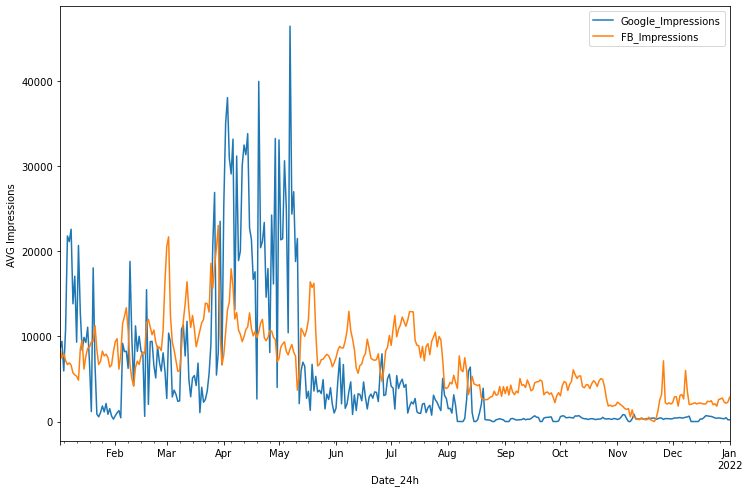

In [233]:
master.groupby('Date_24h').mean()[['Google_Impressions','FB_Impressions']].plot(ylabel='AVG Impressions');


#### AVG Conversions over time

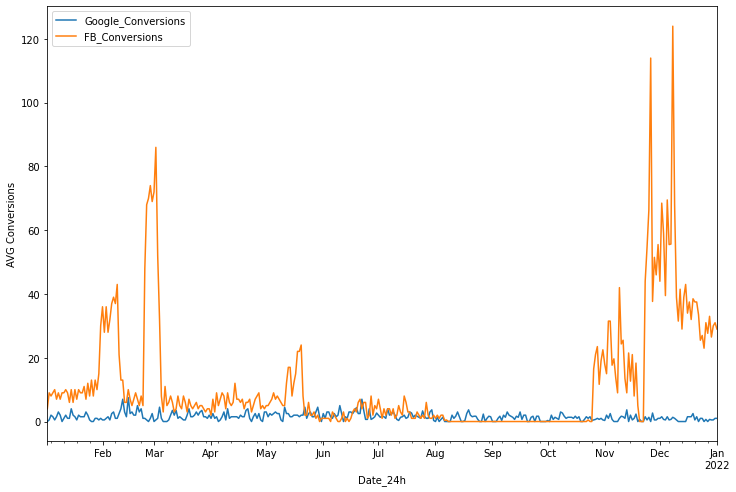

In [234]:
master.groupby('Date_24h').mean()[['Google_Conversions','FB_Conversions']].plot(ylabel='AVG Conversions');


#### CTR Over time

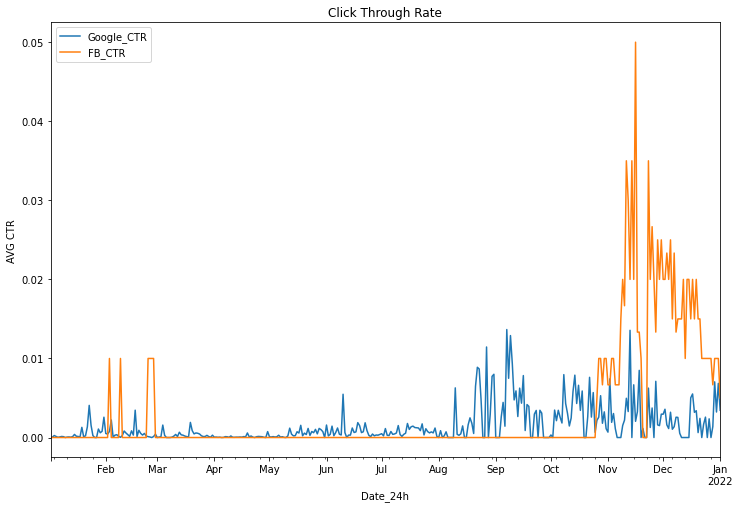

In [235]:
master.groupby('Date_24h').mean()[['Google_CTR','FB_CTR']].plot(title='Click Through Rate', ylabel='AVG CTR');


#### Impressions, Conversions, and Cost of Ads per Day of Week

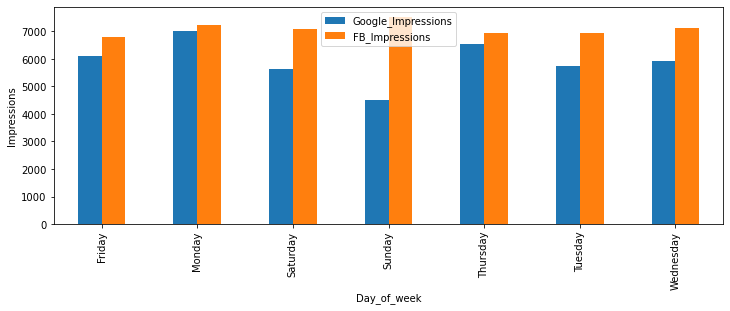

In [259]:
master.groupby('Day_of_week').mean()[['Google_Impressions','FB_Impressions']].plot(kind= 'bar', figsize = (12,4), ylabel='Impressions');

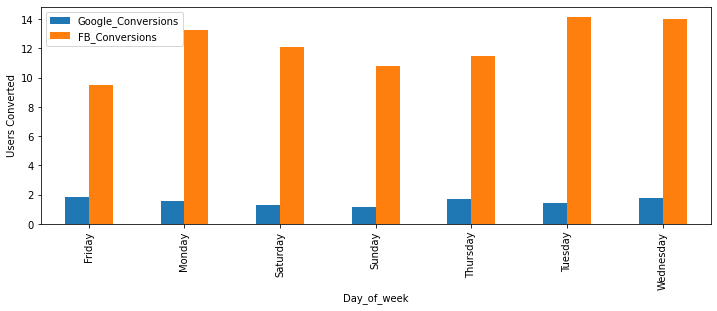

In [258]:
master.groupby('Day_of_week').mean()[['Google_Conversions','FB_Conversions']].plot(kind= 'bar', figsize = (12,4), ylabel='Users Converted');

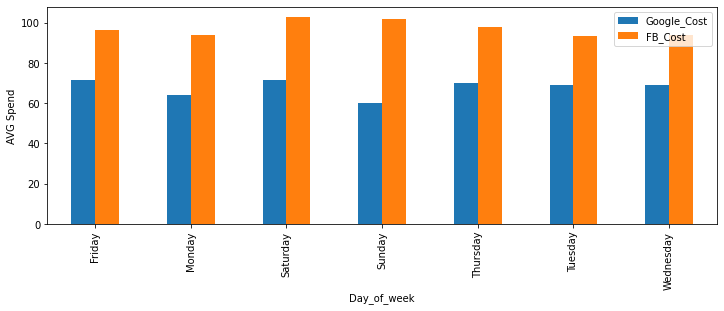

In [254]:
master.groupby('Day_of_week').mean()[['Google_Cost','FB_Cost']].plot(kind= 'bar',figsize = (12,4), ylabel='AVG Spend');

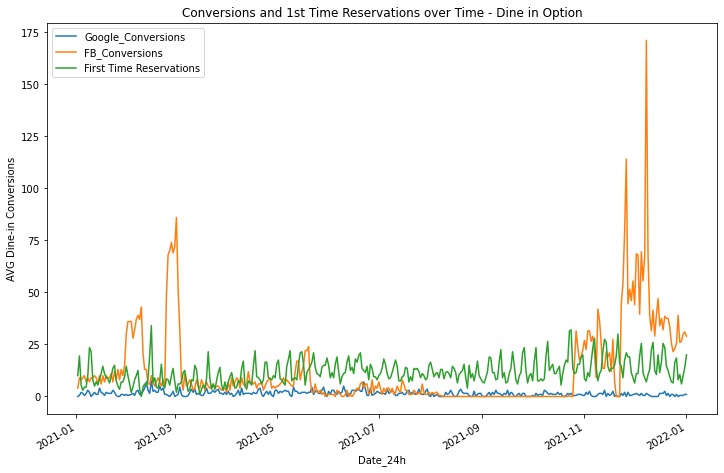

In [262]:
dine_in.groupby('Date_24h').mean()[['Google_Conversions','FB_Conversions', 'First Time Reservations']].plot(title = 'Conversions and 1st Time Reservations over Time - Dine in Option', ylabel='AVG Dine-in Conversions');

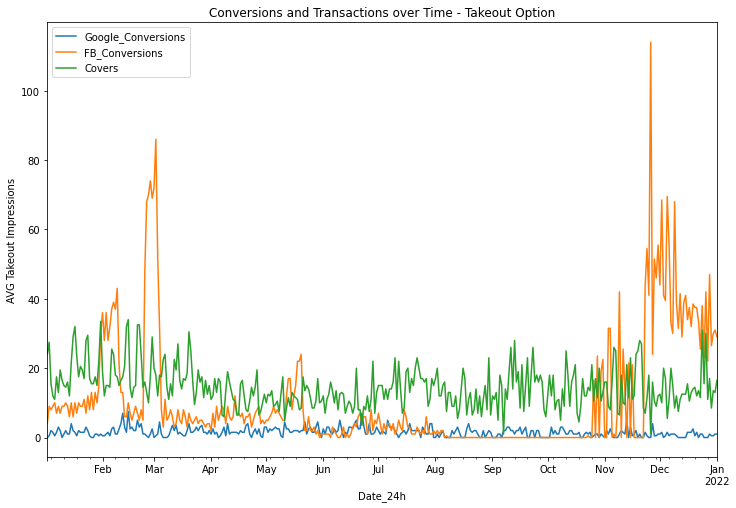

In [267]:
takeout.groupby('Date_24h').mean()[['Google_Conversions','FB_Conversions','Covers']].plot(title='Conversions and Transactions over Time - Takeout Option', ylabel='AVG Takeout Impressions');


---
### GOOGLE 

In [239]:
Impressions_G = master['Google_Impressions']

In [240]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompositionCov = seasonal_decompose(Impressions_G, period = 4)

<Figure size 864x576 with 0 Axes>

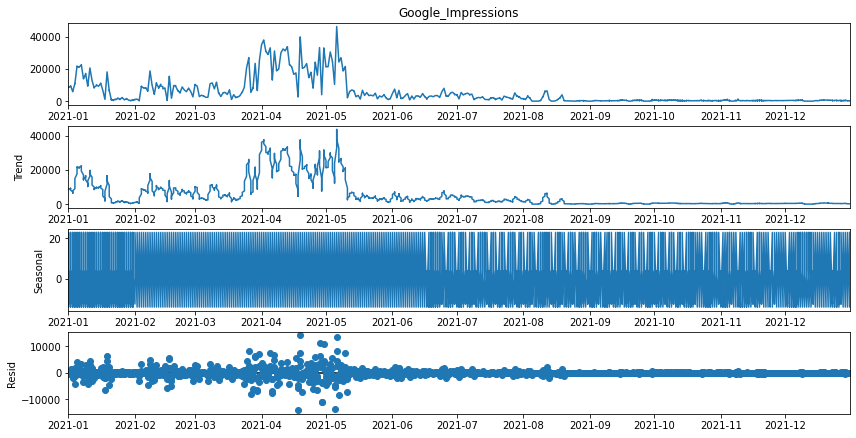

In [241]:
fig = plt.figure()
fig = decompositionCov.plot(); 
fig.set_size_inches(12, 6)

In [242]:
master['Google_Impressions'].autocorr(lag=1)

0.9362899127459527

In [243]:
master['Google_Impressions'].autocorr(lag=8)

0.784305021532711

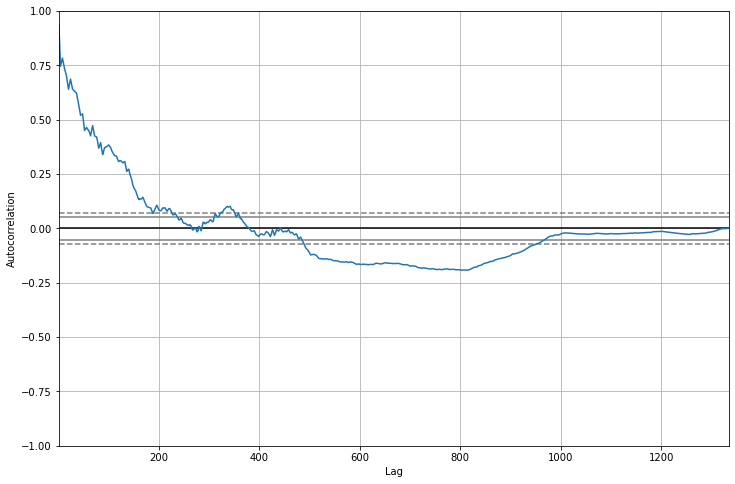

In [244]:
autocorrelation_plot(master['Google_Impressions']);

In [245]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

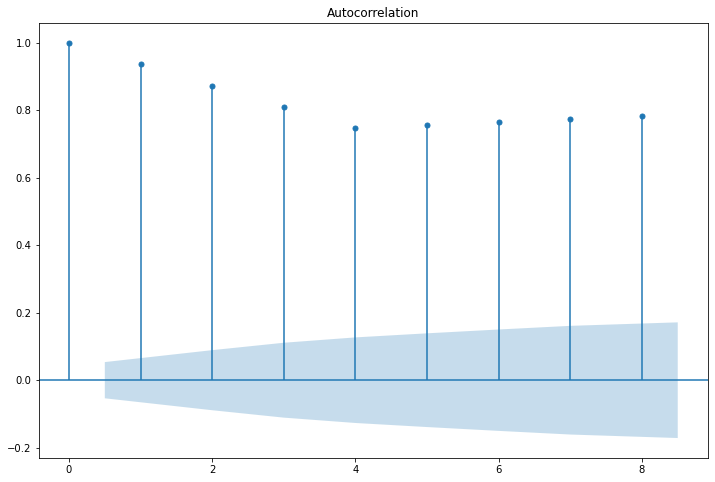

In [246]:
plot_acf(master['Google_Impressions'].values, lags=8)
plt.show();

In [247]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

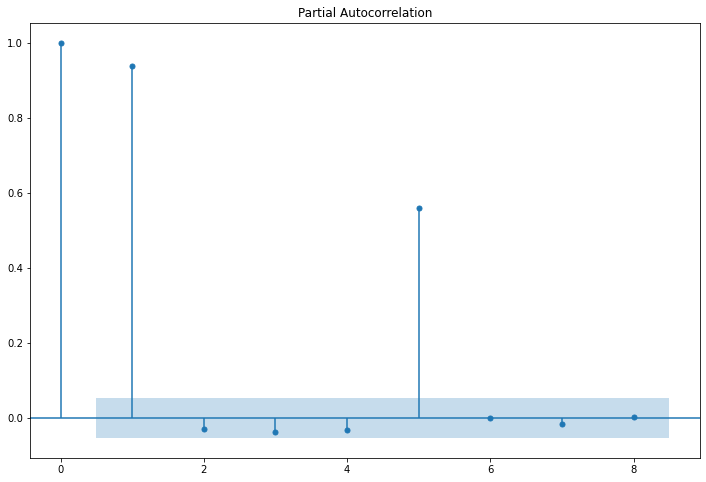

In [248]:
plot_pacf(master['Google_Impressions'], lags=8)
plt.show();

---
### FACEBOOK

In [270]:
Impressions_FB = master['FB_Impressions']

In [271]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompositionFB = seasonal_decompose(Impressions_FB, period = 4)

<Figure size 864x576 with 0 Axes>

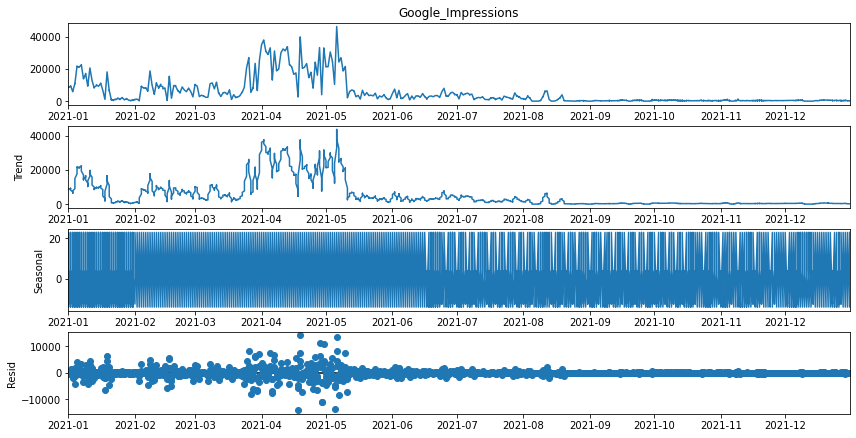

In [272]:
fig = plt.figure()
fig = decompositionCov.plot(); 
fig.set_size_inches(12, 6)

In [273]:
master['FB_Impressions'].autocorr(lag=1)

0.43292980299178807

In [274]:
master['FB_Impressions'].autocorr(lag=8)

0.6973078620899881

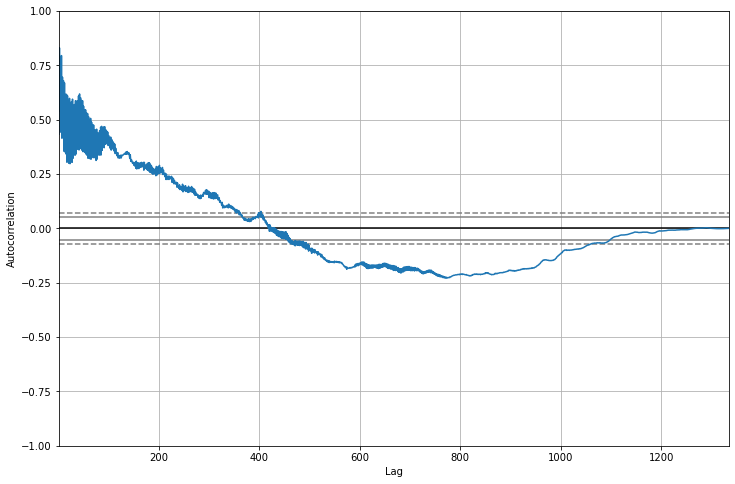

In [275]:
autocorrelation_plot(master['FB_Impressions']);

In [276]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

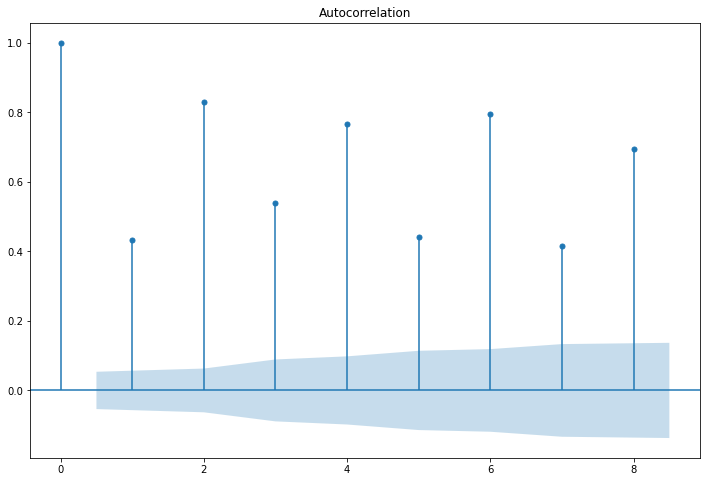

In [277]:
plot_acf(master['FB_Impressions'].values, lags=8)
plt.show();

In [278]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

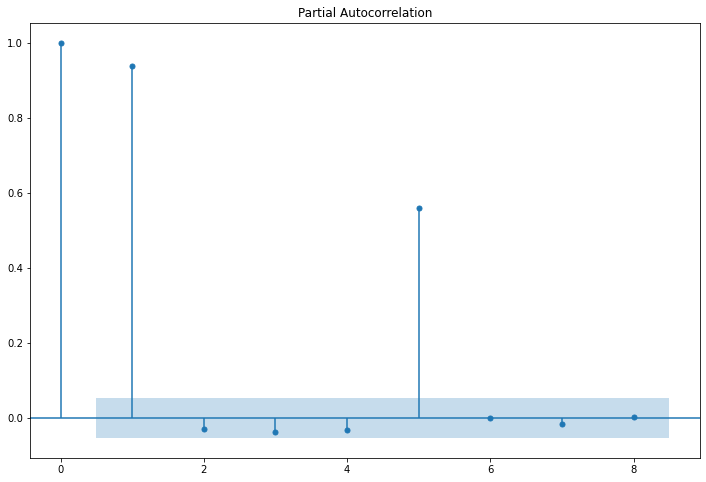

In [279]:
plot_pacf(master['Google_Impressions'], lags=8)
plt.show();

# FINAL CONCLUSIONS


The low correlation to the general business and even the negative correlation from Digital Marketing efforts seem to be explained by the lack of strategy. The Impressions over time are erratic and so the conversions. They do not reflect any impact of behaviour in First Time Reservations neither on Takeout Transactions overtime. However there seem to be autocorrelation in both platforms, FB and Google, which could be a good time predictor of online behaviour, potentially creating sales opportunities. 

## NEXT STEPS

* I would include more information to run the model again, such as customer reviews and average time spent per cover. 

* It would be interesting to do a Sentiment Analysis using customer reviews. 